In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.lines import Line2D 
# File to Load 
file_to_load = "Resources/owid-covid-data.csv"

# Read Purchasing File and store into Pandas data frame
covid_data_df = pd.read_csv(file_to_load)

In [49]:
covid_data_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [50]:
#Look for the column names
print(covid_data_df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [51]:
#Extract interested columns
gdp_covid_data_df1=covid_data_df[['iso_code', 'location', 'date',
       'total_deaths_per_million','gdp_per_capita']]
gdp_covid_data_df1.head()

,iso_code,location,date,total_deaths_per_million,gdp_per_capita
0,AFG,Afghanistan,2020-02-24,NaN,1803.987
1,AFG,Afghanistan,2020-02-25,NaN,1803.987
2,AFG,Afghanistan,2020-02-26,NaN,1803.987
3,AFG,Afghanistan,2020-02-27,NaN,1803.987
4,AFG,Afghanistan,2020-02-28,NaN,1803.987


In [52]:
#Drop NaN values and duplicates
Clean_gdp_covid_data_df=gdp_covid_data_df1.dropna(inplace=False).drop_duplicates()
Clean_gdp_covid_data_df

,iso_code,location,date,total_deaths_per_million,gdp_per_capita
28,AFG,Afghanistan,2020-03-23,0.025,1803.987
29,AFG,Afghanistan,2020-03-24,0.025,1803.987
30,AFG,Afghanistan,2020-03-25,0.025,1803.987
31,AFG,Afghanistan,2020-03-26,0.050,1803.987
32,AFG,Afghanistan,2020-03-27,0.050,1803.987
...,...,...,...,...,...
116542,ZWE,Zimbabwe,2021-09-09,299.559,1899.775
116543,ZWE,Zimbabwe,2021-09-10,300.288,1899.775
116544,ZWE,Zimbabwe,2021-09-11,300.553,1899.775
116545,ZWE,Zimbabwe,2021-09-12,300.686,1899.775


In [53]:
#DF info
Clean_gdp_covid_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91880 entries, 28 to 116546
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  91880 non-null  object 
 1   location                  91880 non-null  object 
 2   date                      91880 non-null  object 
 3   total_deaths_per_million  91880 non-null  float64
 4   gdp_per_capita            91880 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.2+ MB


# GDP Classifications by income level

Countires are clafficed into following tiers based on GDP(2011 US Dollar standard)

Low Income (LI)           = <1036
Lower-Middle Income (LMI) = 1036-4045
High-Middle Income (UMI)  = 4046-12535
High Income (HI)          = >12535



reference: https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2020-2021


In [54]:
#Bin the GDP levels into categories mentioned above,
bins=[0,1036,4046,12536,1000000]
group_labels=["LI","LMI","HMI","HI"]
pd.cut(Clean_gdp_covid_data_df["gdp_per_capita"], bins, labels=group_labels)
Clean_gdp_covid_data_df["GDP_groups"]=pd.cut(Clean_gdp_covid_data_df["gdp_per_capita"], bins, labels=group_labels)
Clean_gdp_covid_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91880 entries, 28 to 116546
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   iso_code                  91880 non-null  object  
 1   location                  91880 non-null  object  
 2   date                      91880 non-null  object  
 3   total_deaths_per_million  91880 non-null  float64 
 4   gdp_per_capita            91880 non-null  float64 
 5   GDP_groups                91880 non-null  category
dtypes: category(1), float64(2), object(3)
memory usage: 4.3+ MB


In [55]:
#Groupby location and subsequently into GDP_groups
country_wise_data_df=Clean_gdp_covid_data_df.groupby(["location","GDP_groups"]).agg({'total_deaths_per_million':['max'],'gdp_per_capita':['mean']}).dropna(how='all').reset_index()
country_wise_data_df
#print(country_wise_data_df.columns)


,location,GDP_groups,total_deaths_per_million,gdp_per_capita
,,,max,mean
0,Afghanistan,LMI,179.965,1803.987
1,Albania,HMI,886.898,11803.431
2,Algeria,HI,125.424,13913.839
3,Angola,HMI,39.636,5819.495
4,Antigua and Barbuda,HI,486.184,21490.943
...,...,...,...,...
175,Vietnam,HMI,159.521,6171.884
176,World,HI,589.117,15469.207
177,Yemen,LMI,52.606,1479.147


In [56]:
#contstruct dataframe with mean of GDP and max of total deaths with location and GDP groups as base
GDP_mean=country_wise_data_df['gdp_per_capita', 'mean']
Deaths_max=country_wise_data_df['total_deaths_per_million',  'max']
Country=country_wise_data_df["location"]
GDP_groups=country_wise_data_df["GDP_groups"]

GDP_deaths_df=pd.DataFrame({"Country":Country,
                           "GDP groups":GDP_groups,
                           "GDP":GDP_mean,
                           "Total Deaths Per Million":Deaths_max})
GDP_deaths_df

,Country,GDP groups,GDP,Total Deaths Per Million
0,Afghanistan,LMI,1803.987,179.965
1,Albania,HMI,11803.431,886.898
2,Algeria,HI,13913.839,125.424
3,Angola,HMI,5819.495,39.636
4,Antigua and Barbuda,HI,21490.943,486.184
...,...,...,...,...
175,Vietnam,HMI,6171.884,159.521
176,World,HI,15469.207,589.117
177,Yemen,LMI,1479.147,52.606
178,Zambia,LMI,3689.251,192.012


In [57]:
#Outlier check1
#Quantify entries per GDP group
GDP_deaths_df["GDP groups"].value_counts()

HI     89
HMI    47
LMI    39
LI      5
Name: GDP groups, dtype: int64

In [58]:
#Outlier check2
#Country with highest death count
GDP_deaths_df.loc[GDP_deaths_df['Total Deaths Per Million']==GDP_deaths_df['Total Deaths Per Million'].max()]


,Country,GDP groups,GDP,Total Deaths Per Million
128,Peru,HMI,12236.706,5959.307


In [59]:
#Country with highest GDP
GDP_deaths_df.loc[GDP_deaths_df['GDP']==GDP_deaths_df['GDP'].max()]

,Country,GDP groups,GDP,Total Deaths Per Million
132,Qatar,HI,116935.6,206.106


## Figure 1. Scatter plot representation of GDP vs Mortality

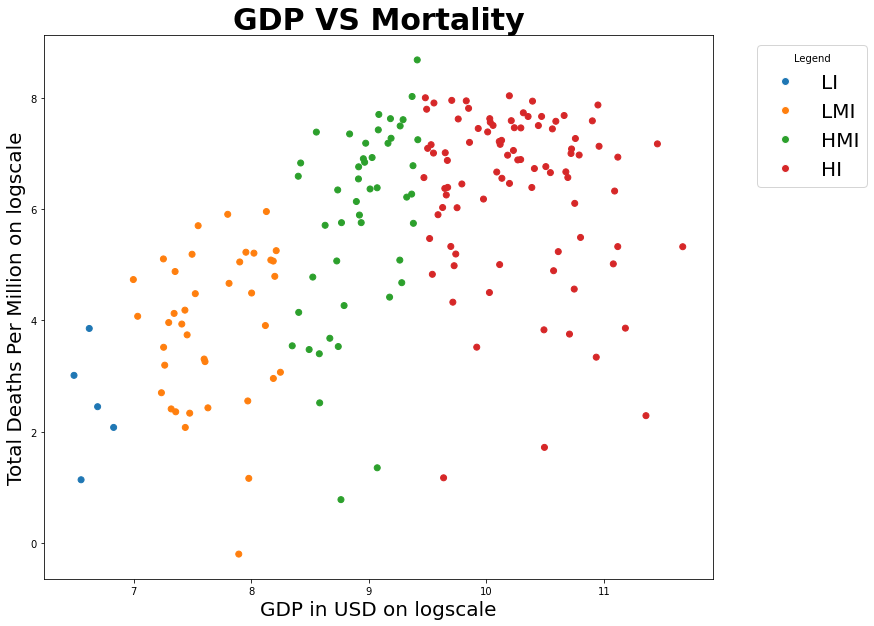

In [60]:
x_axis=np.log(GDP_deaths_df["GDP"],dtype='float64')
y_axis=np.log(GDP_deaths_df["Total Deaths Per Million"],dtype='float64') 
colors={'LI':'tab:blue','LMI':'tab:orange','HMI':'tab:green','HI':'tab:red'}
#label=['LI','LMI','HMI','HI']

fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(x_axis, y_axis, c=GDP_deaths_df['GDP groups'].map(colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Legend', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=20)
ax.set_title('GDP VS Mortality', fontweight="bold", fontsize=30)
ax.set_xlabel('GDP in USD on logscale',fontsize=20)
ax.set_ylabel('Total Deaths Per Million on logscale',fontsize=20)
plt.savefig('Outputs_VS/GDP Vs Mortality Scatter Plot')
plt.show()

## Figure 2: Test for Correlation between GDP and Mortality

In [61]:
#employing pearson's correlation
correlation=round(st.pearsonr(GDP_deaths_df["GDP"],GDP_deaths_df["Total Deaths Per Million"])[0],2)
print(f"The correlation between GDP and Mortality is {correlation}")

#assign a variable to the linear regression formaula to obtain the parameters values
model=st.linregress(GDP_deaths_df["GDP"],GDP_deaths_df["Total Deaths Per Million"])
model


The correlation between GDP and Mortality is 0.2


LinregressResult(slope=0.009131830948109458, intercept=614.1557895350652, rvalue=0.1970942023070798, pvalue=0.008003107816314895, stderr=0.0034046343246412866)

In [62]:
slope=0.009131830948109458
intercept=614.1557895350652

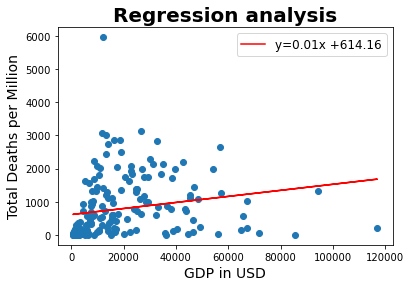

In [63]:
#plot the line graph
line=slope*(GDP_deaths_df["GDP"])+intercept

plt.scatter(GDP_deaths_df["GDP"], GDP_deaths_df["Total Deaths Per Million"])

plt.plot(GDP_deaths_df["GDP"], line, 'r', label = 'y={:.2f}x +{:.2f}'.format(slope,intercept))
plt.xlabel('GDP in USD',fontsize=14)
plt.ylabel('Total Deaths per Million',fontsize=14)
plt.title('Regression analysis',fontsize=20, fontweight="bold")

plt.legend(fontsize=12)
plt.savefig('Outputs_VS/GDP Vs Mortality Linear regression')
fig.set_size_inches(14,10)
plt.show()

In [64]:
#The r-value of 0.19 suggests that there is weak positive correlation
#The p-value of 0.008 suggests that it is statisically significant
#Making sense of both r-value and p-value together, gives an impression that the weak relation between GDP and Mortality may have occurred by chance.
